### Importing libraries



In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Importing dataset from PC

In [4]:
dataset = pd.read_csv('datasets_6883_9923_weather.csv')
dataset.shape

(366, 22)

In [5]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


### Ploting a graph between MinTemp & MaxTemp

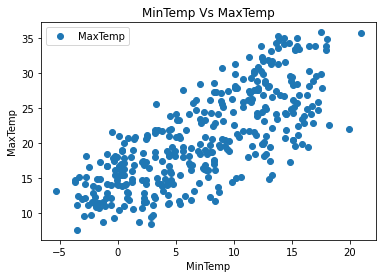

In [6]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp Vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

### Ploting MaxTemp using seaborn 

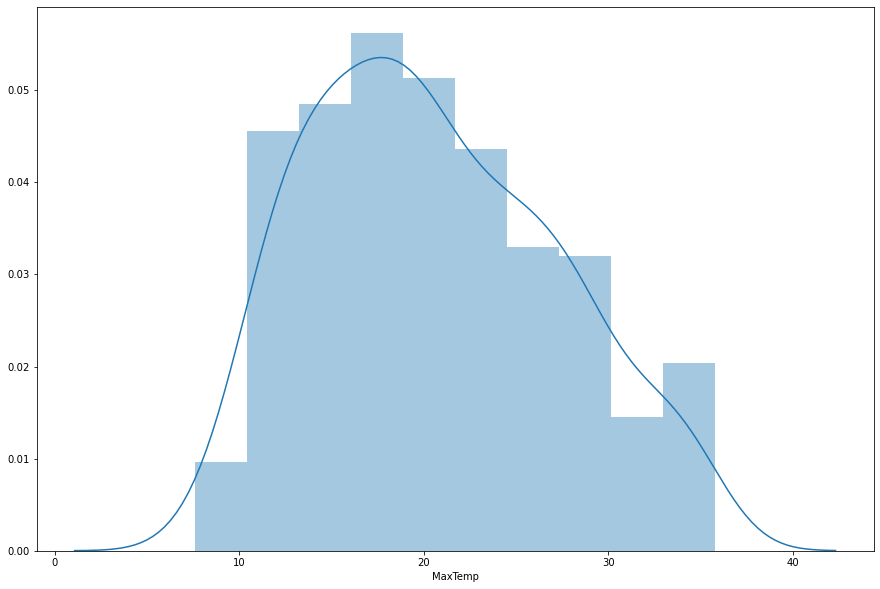

In [7]:
plt.figure(figsize=(15,10),frameon=False)
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [8]:
X = dataset['MinTemp'].values.reshape(-1,1)
Y = dataset['MaxTemp'].values.reshape(-1,1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [10]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [11]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[14.56202411]
[[0.81953755]]


In [12]:
y_predict = regressor.predict(x_test)

In [13]:
df = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predict.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


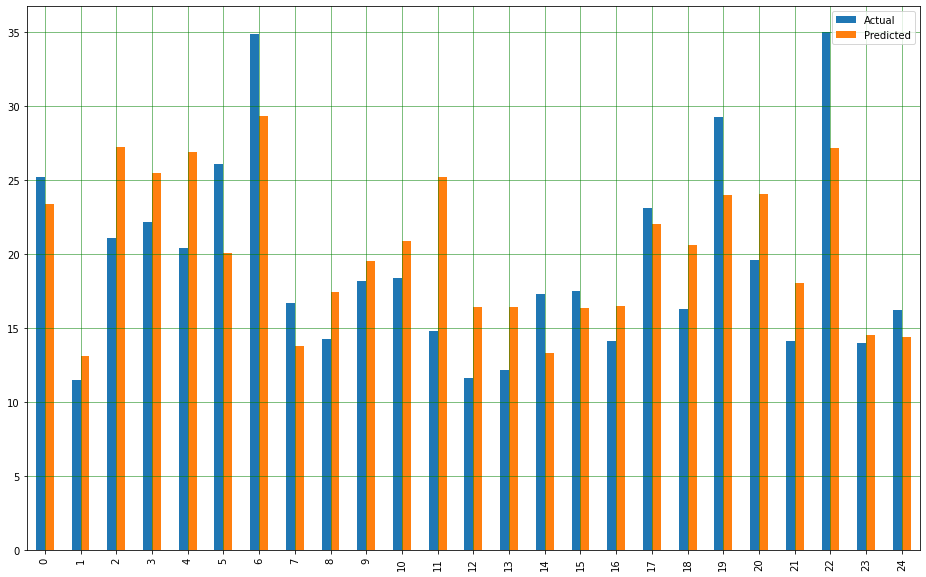

In [14]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

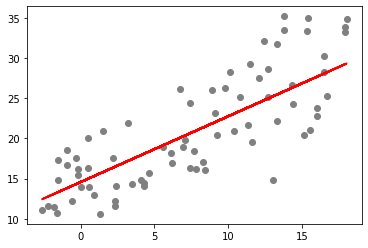

In [15]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_predict, color='red', linewidth=2)
plt.show()

In [16]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test, y_predict)))

Mean Absolute Error: 3.5094353112899594
Mean Squared Error: 17.011877668640622
Root Mean Squared Error: 1.8733486891900182
